### **Waze User Churn Project**

The following is a project to predict user churn from the Waze app, using data provided by the Google Advanced Data Analytics professional certificate. The dataset represents several variables on user information since onboarding, and some gathered over the period of one month.

This notebook covers the first steps of exploratory data analysis and feature engineering.

In [154]:
# Packages for data manipulation
import numpy as np
import pandas as pd

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Package for data modeling
from scipy import stats

In [155]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

### **Exploratory data analysis**

In [156]:
# Begin inspecting the data
pd.set_option('display.max_columns', None)
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [157]:
# Prepare DataFrame for EDA
df = df0.copy()
df.drop(columns=['ID'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


700 values are missing from the `label` column, so we will compare the two populations (with and without null values).

In [158]:
# Isolate rows that are missing labels
df_null = df[df['label'].isna()]
df_null.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [159]:
# Isolate rows with labels
df_not_null = df[~df['label'].isna()]
df_not_null.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


On average, the population with labels has generally more sessions, navigations, activity days, driving days, and longer drives (in duration and length). To check these differences with respect to `device`:

In [160]:
# Calculate % of iPhone and Android users in the population without labels
df_null['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [161]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

In [162]:
# For each label, calculate the number and percentage of Android users and iPhone users
pct_device_counts = df.groupby('label')['device'].value_counts(normalize=True)
pct_device_counts

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

Text(0.5, 1.0, 'retention by device')

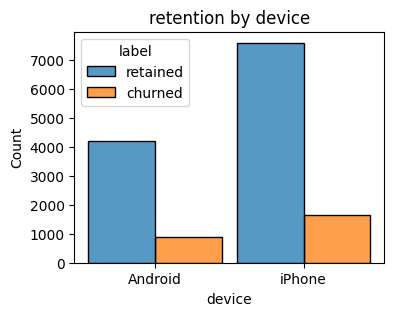

In [163]:
# Histogram of churn by device type
plt.figure(figsize=(4,3))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9)
plt.title('retention by device')

The percentage of different device users is consistent with the full dataset. Additionally, the churn rate for both phone users was within one percentage point of each other. This does not suggest a non-random cause of the missing data based on `device`, nor that churn is likely correlated with `device`.

Because the observations with missing labels comprise less than 5% of the data, we will drop these rows and continue exploring the data.

In [164]:
df.dropna(subset=['label'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [165]:
# Calculate count and proportion of retained vs. churned users
print(df['label'].value_counts(normalize=True))
print()
print(df['label'].value_counts())

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

label
retained    11763
churned      2536
Name: count, dtype: int64


In [166]:
# Calculate median values of all columns for churned and retained users
medians = df.groupby('label').median(numeric_only=True)
medians

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Churned users averaged ~3 more drives in the last month and drove ~200km and for 2.5 hours more. Retained users used Waze on more than twice as many days in the last month. Churned users had more drives in fewer days, and trips were farther and longer in duration.

In [167]:
# Access specific median values for comparison
median_km = medians['driven_km_drives']
median_drives = medians['drives']
median_days = medians['driving_days']

# Divide the median distance by median number of drives
median_km / median_drives

label
churned     73.053113
retained    73.716694
dtype: float64

In [168]:
# Divide the median distance by median number of driving days
median_km / median_days

label
churned     608.775944
retained    247.477472
dtype: float64

In [169]:
# Divide the median number of drives by median number of driving days
median_drives / median_days

label
churned     8.333333
retained    3.357143
dtype: float64

The median churned user drove nearly 250% the per-driving-day distance and significantly more drives per driving day than the median retained user. This may be representative of a user profile of full-time drivers, who have different needs than the average commuter. Further data on the largest drivers may be beneficial.

### **Variable examination and visualization**

In [170]:
# Function for creating boxplots and histograms to visualize the spread and distribution of key numeric variables

def plotter(column_str, median_text=True, **kwargs):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))

    # create boxplot
    sns.boxplot(x=df[column_str], fliersize=1, ax=ax1)
    ax1.set_title(f'{column_str} boxplot')
    plt.title(f'{column_str} boxplot')
    
    # create histogram with optional median indicator
    median=round(df[column_str].median(), 1)
    hist = sns.histplot(x=df[column_str], ax=ax2)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        hist.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=hist.transAxes)
    else:
        print('Median: ', median)
    ax2.set_title(f'{column_str} histogram')

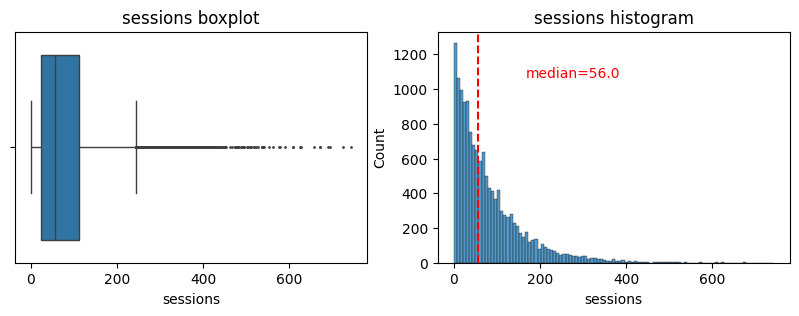

In [171]:
# Sessions are the number of times a user opened the app during the last month
plotter('sessions')

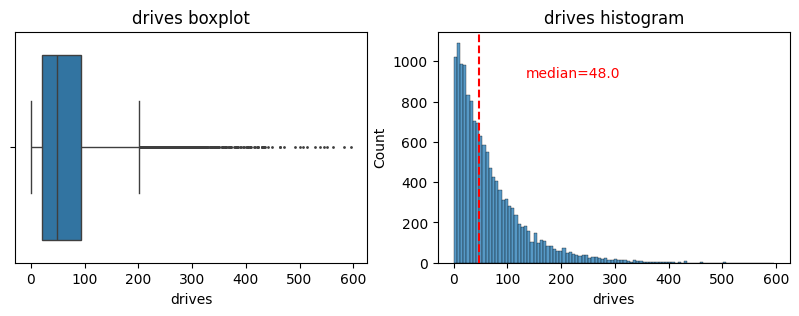

In [172]:
# Drives are the number of times a user drove at least 1km during the last month
plotter('drives')

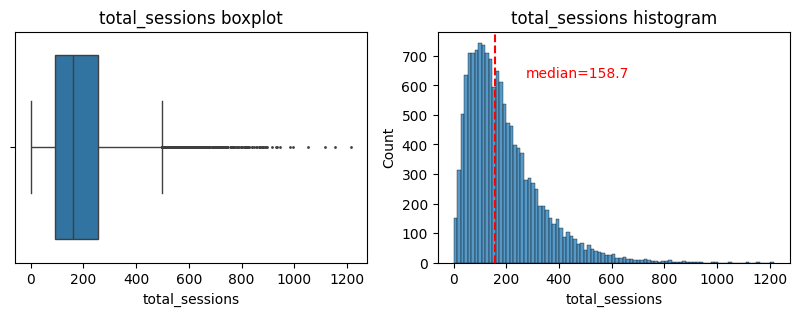

In [173]:
# Total sessions are an estimate of the total number of sessions since onboarding
plotter('total_sessions')

The median number of total sessions is 158.7, whereas the median number of sessions in the last month is 56.0, a fairly large portion of the total sessions.

Median:  1749.0


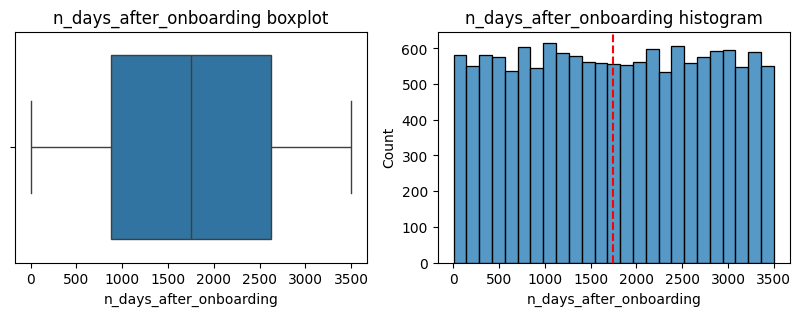

In [174]:
# The 'n_days_after_onboarding' variable is the number of days since a user signed up for the app
plotter('n_days_after_onboarding', median_text=False)

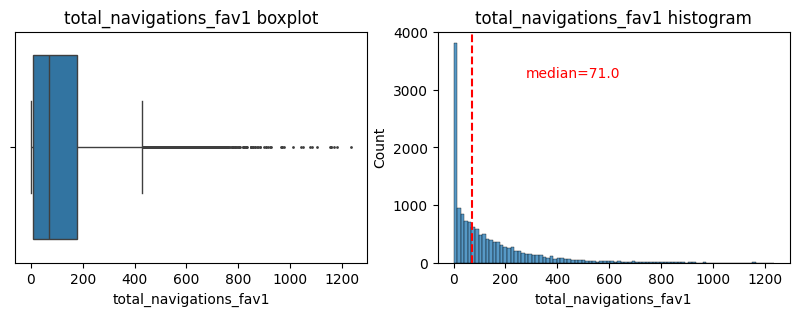

In [175]:
# The following two total navigation variables represent locations which drivers flagged as "favorites" (which is not mandatory)
plotter('total_navigations_fav1')

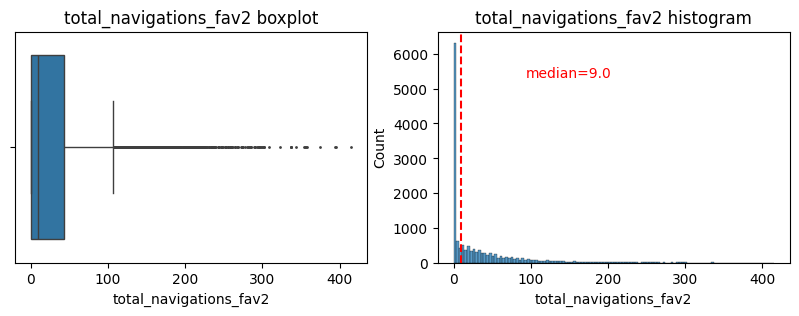

In [176]:
plotter('total_navigations_fav2')

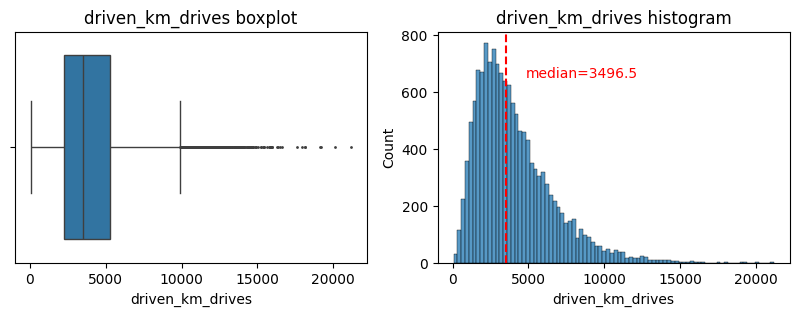

In [177]:
# 'driven_km_drives' is the total kilometers driven during the month
plotter('driven_km_drives')

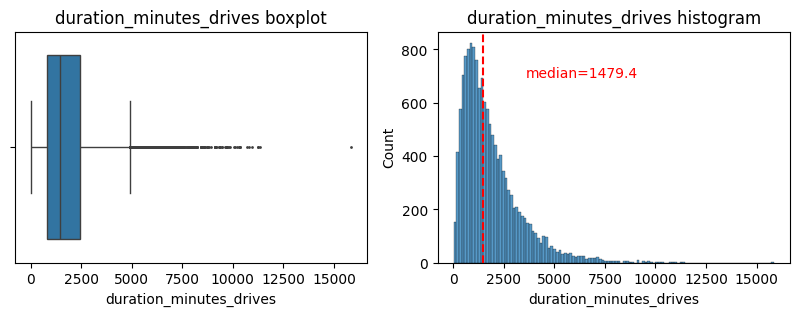

In [178]:
# 'duration_minutes_drives' is the total duration driven during the month, in minutes
plotter('duration_minutes_drives')

Median:  16.0


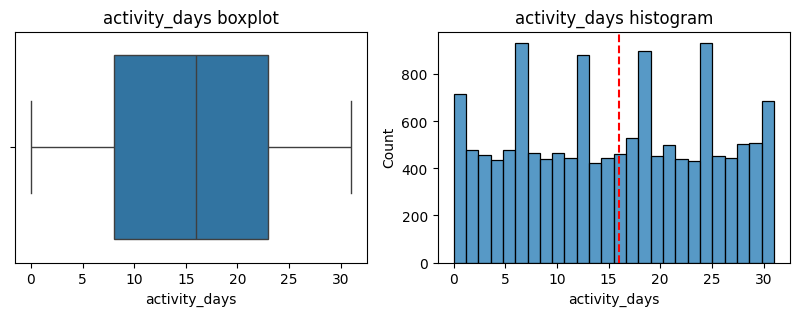

In [179]:
# Activity days are the number of days a user opened the app during the month
plotter('activity_days', median_text=False)

Notably, the distribution of `activity_days` is nearly uniform, in contrast to the heavily right-skewed `sessions` distribution, which we would expect to be correlated.

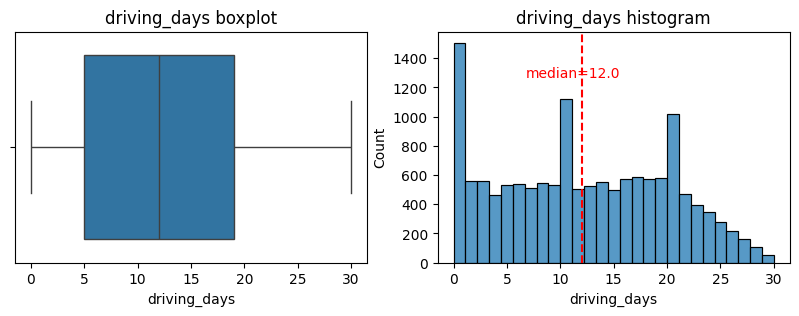

In [180]:
# Driving days are the number of days a user drove at least 1km during the month
plotter('driving_days')

The distribution of `driving_days` is nearly uniform, largely correlating with `activity_days` except for the distribution tailing off toward the right. Additionally, the number of users who did not drive at all during the month (~1450) is significantly greater than the number that did not open the app during the month (~700), indicating a number of users who open the app yet do not drive.

We will plot `driving_days` and `activity_days` on the same plot to better compare the two distributions.

Text(0.5, 1.0, 'counts of driving days vs. activity days')

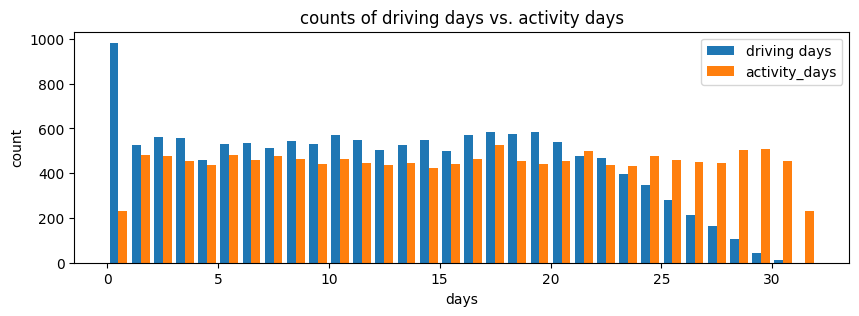

In [181]:
# Histogram of driving_days and activity_days
plt.figure(figsize=(10,3))
label = ['driving days','activity_days']
plt.hist([df['driving_days'], df['activity_days']],
        bins=range(0,33),
        label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('counts of driving days vs. activity days')

In [182]:
# Compare the max number of driving days and activity days
print('Max driving days: ' + str(df['driving_days'].max()))
print('Max activity days: ' + str(df['activity_days'].max()))

Max driving days: 30
Max activity days: 31


The maximum number of `activity_days` is 31, whereas the maximum number of `driving_days` is 30, meaning additional context or data may be worthwhile, as there is a chance that a user drove all days of the month.

### **Feature engineering**

From earlier EDA, we found that churn rate correlates with the distance driven per driving day in the last month, which we can capture in a new feature.

In [183]:
# Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

c:\Users\davko\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [184]:
# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per driving day, which is unrealistically high. We will visualize this feature in a histogram, disregarding values greater than 1,200.

Text(0.5, 1.0, 'churn rate by mean km per driving day')

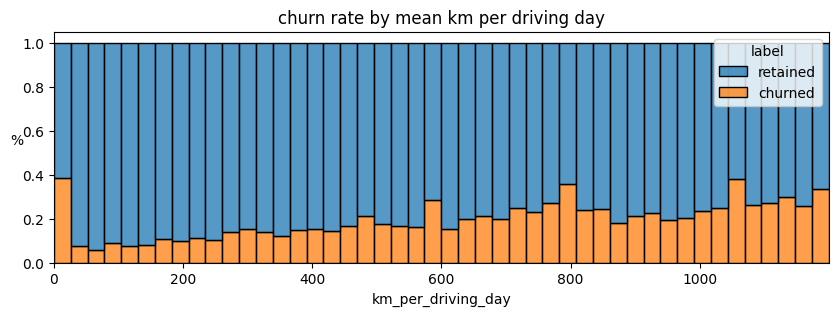

In [203]:
# Histogram of the churn rate by distance driven per driving day
plt.figure(figsize=(10,3))
data = df[df['km_per_driving_day']<=1200]
sns.histplot(data=data,
            x='km_per_driving_day',
            hue='label',
            multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('churn rate by mean km per driving day')

The churn rate tends to increase as the mean daily distance driven increases, and it would be worthwhile to investigate the reasons for long-distance users leaving the app.

Text(0.5, 1.0, 'churn rate by number of driving days')

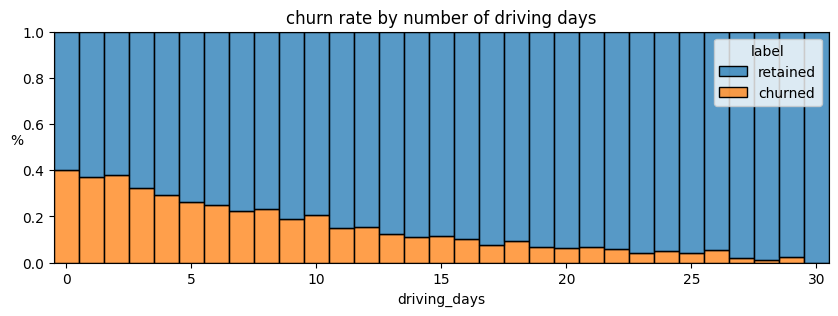

In [186]:
# Histogram of the churn rate by number of driving days
plt.figure(figsize=(10,3))
sns.histplot(data=df,
            x='driving_days',
            hue='label',
            multiple='fill',
            discrete=True
            )
plt.ylabel('%', rotation=0)
plt.title('churn rate by number of driving days')

The churn rate decreases as the number of driving days increases, with 40% of users with no driving days churning, and no users who drove 30 days churning.

In [187]:
# Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

Text(0.5, 1.0, 'percent_sessions_in_last_month histogram')

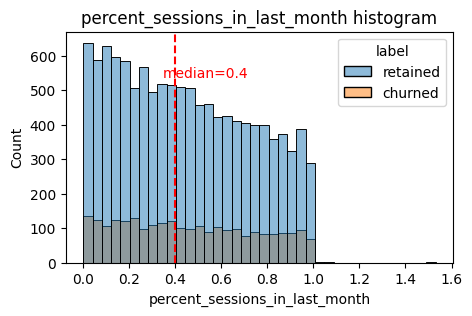

In [188]:
# Histogram of the percent of sessions within the last month
column_str = 'percent_sessions_in_last_month'

plt.figure(figsize=(5,3))
median = round(df[column_str].median(), 1)
ax = sns.histplot(x=df[column_str],
                  hue=df['label'],
                  multiple='layer')
plt.axvline(median, color='red', linestyle='--')
ax.text(0.25, 0.85, f'median={median}', color='red',
        ha='left', va='top', transform=ax.transAxes)
plt.title(f'{column_str} histogram')

In [189]:
df['n_days_after_onboarding'].median()

1749.0

Half of the users in the dataset had 40% or more of their sessions in the last month, yet the overall median time since onboarding is almost five years (1,740 days).

The above box plots showed that many of our variables have outliers, mostly present due to the right-skewed distributions. As a demonstration, we will impute the high-end outliers for specific columns with their respective 95th percentiles, which will also support our later modeling. The seven columns below have maximum values multiple standard deviations greater than the 75th percentile.

In [190]:
# Create a list of columns that contain clear outliers
df_columns = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2',
           'driven_km_drives', 'duration_minutes_drives']
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,581.942399,0.449837
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,1038.254509,0.286863
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.530637


In [191]:
# Impute outliers greater than the 95th percentile
for col in df_columns:
    upper = np.percentile(df[col], 95)
    df[col] = df[col].apply(lambda x: upper if x > upper else x)

df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.449837
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.286863
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.530637


In [192]:
# Create 'professional driver' feature for users with 60 or more drives and who drove on 15 or more days in the last month
# These values are estimated thresholds for our analysis
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)
df['professional_driver'].describe()

count    14299.000000
mean         0.173998
std          0.379121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: professional_driver, dtype: float64

In [205]:
# Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Check the churn rate for professionals and non-professionals
print(df.groupby(['professional_driver'])['label'].value_counts(normalize=True))

professional_driver
0    11811
1     2488
Name: count, dtype: int64
professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64


The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This feature could add predictive signal to our models. We will also create the below features of interest:

In [194]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14299.000000
mean         0.330082
std          1.292477
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [195]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14299.000000
mean       189.457762
std        327.519818
min         72.013095
25%         92.887853
50%        121.231277
75%        191.157779
max      21822.419685
Name: km_per_hour, dtype: float64

In [196]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

c:\Users\davko\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.365859e+01
50%      7.429025e+01
75%      1.828194e+02
max               inf
Name: km_per_drive, dtype: float64

In [197]:
# Convert infinite values to zero
df.loc[df['km_per_drive'] == np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    14299.000000
mean       225.825460
std        572.543937
min          0.000000
25%         32.910489
50%         72.325946
75%        177.431844
max       8898.716275
Name: km_per_drive, dtype: float64

In [198]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_sessions_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['percent_of_sessions_to_favorite'].describe()

count    14299.000000
mean         1.575245
std          8.243641
min          0.000000
25%          0.212409
50%          0.647726
75%          1.593733
max        668.888397
Name: percent_of_sessions_to_favorite, dtype: float64

### **Hypothesis testing**

As further investigation, we will conduct a two-sample hypothesis test for the mean, to determine if there is a statistically significant difference in the mean number of rides between users of each device type (iPhone® and Android™). 

This will be a Welch's t-test for two independent samples, as opposed to the "student's" t-test, because we cannot assume that the two populations have the same variance. We will assume that the sample means for both populations are normally distributed.

In [199]:
# Evaluate the mean number of rides between device types
df.groupby('device')['drives'].mean()

device
Android    63.096177
iPhone     64.442385
Name: drives, dtype: float64

iPhone users appear to have a higher number of drives on average than Android users, however to continue with our t-test:

1. **State the null and alternative hypotheses**

$H_0$: There is no difference between the sample means of number of drives between iPhone and Android users.

$H_A$: There is a difference between the sample means of number of drives between iPhone and Android users.

2. **Choose a significance level**

We will choose 5% as our significance level.

3. **Find the p-value**

In [200]:
# 1. Isolate the `drives` column for iPhone users
iphones = df[df['device']=='iPhone']['drives']

# 2. Isolate the `drives` column for Android users
androids = df[df['device']=='Android']['drives']

# 3. Perform the t-test
t_stat, p_val = stats.ttest_ind(a=iphones, b=androids, equal_var=False)
print(f't-statistic: {t_stat:.4}\np-value: {p_val:.4}')

t-statistic: 1.406
p-value: 0.1598


4. **Reject or fail to reject the null hypothesis**

Our p-value is 0.16. Because this is greater than our significance value of 0.05, we fail to reject the null hypothesis, and conclude that there is not a statistically significant difference between the average number of drives per iPhone vs. Android user. 

The difference we observed (~63% vs. ~64%) could be due to random chance or sampling variability, and we will explore other variables that could determine user churn.

### **Exporting prepared dataset**

In [201]:
df.to_csv('cleaned_waze_dataset.csv', index=False)

Additional analysis and modeling is included in my 'Waze_user_churn_2_modeling.ipynb" notebook.